<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/03_41_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis (PCA)


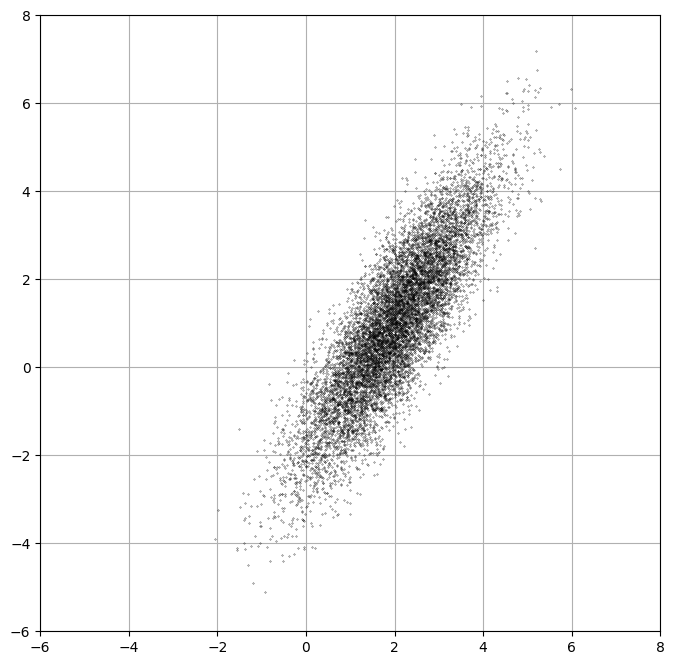

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]

## Parameters to generate data for testing.

# Center of data (mean)
xC = np.array([2, 1])

# Scaling at the principal axes
sig = np.array([2, 0.5])

# Rotation matrix, R rotates points in the xy plane counterclockwise through
# an angle θ about the origin of a two-dimensional Cartesian coordinate system.

# Rotate cloud by pi/3
theta = np.pi/3
#theta = 0.0

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

# Create 10,000 points
nPoints = 10000

### Create random points, scale, rotate and translate
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()

x = X[0,:]
y = X[1,:]

plt.plot(x, y, '.', color='k', markersize=0.5)

plt.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

plt.show()

Xavg (for translation, or center of the data (mean)):
 [1.98587737 0.98228869]
U (rotation matrix or principal components): 
 [[-0.50204362 -0.8648423 ]
 [-0.8648423   0.50204362]]
S (scaling or variance along the principal components ): 
 [1.97526903 0.49787423]


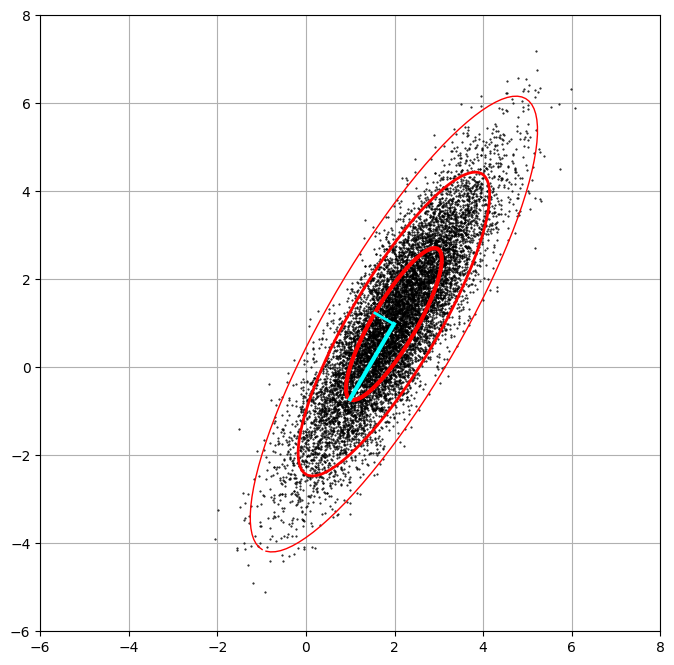

In [50]:
# PCA

# Compute the mean of the rows
Xavg = np.mean(X,axis=1)
print("Xavg (for translation, or center of the data (mean)):\n",Xavg)

# Mean-subtracted data matrix
B = X - np.tile(Xavg,(nPoints,1)).T

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)
#U, S, VT = np.linalg.svd(B,full_matrices=0)


fig = plt.figure()

x = X[0,:]
y = X[1,:]

plt.plot(x, y, '.', color='k',markersize=1)   # Plot data to overlay PCA
plt.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

# Theta to plot confidence intervals 0 - 2pi, 100 points.
theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
# Creates a circle at the origin, scale x and y axis using singular values
# The resulting ellipse is rotated with U matrix.
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])
print("U (rotation matrix or principal components): \n", U)
print("S (scaling or variance along the principal components ): \n", S)
# For plotting, the mean of the X axis is added to Xstd to translate the center
# from origin to the center of the data X
plt.plot(Xavg[0] +   Xstd[0,:], Xavg[1] +   Xstd[1,:],'-',color='r',linewidth=3)
plt.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=2)
plt.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=1)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=3)
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=2)

plt.show()